# コンペの概要
## 1.1 テーマ
　　目的：与えられた地形や環境などの特徴量から森林の被覆タイプ（Cover_Type）を予測すること
　　背景: アメリカ・コロラド州のロースベルト国有林を対象にした地理空間データがベース。30m×30mの区画ごとに、「どの種類の森林カバーが主に存在しているか？」を7種類の中から当てる。
## 1.2 データセット
- カラム（主な特徴量）:
  - Elevation (標高): メートル単位。地形を大きく左右する要素。
  - Aspect (方位角): 0〜360度などで示される斜面の向き。
  - Slope (斜度): 傾斜角度（度数）。
  - Distance系: 川（Hydrology）、道路（Roadways）、火災発生地点（Fire_Points）からの水平距離/垂直距離など。
  - Hillshade系: 日射の当たり方を示す指標（9am, Noon, 3pm それぞれの強度）。
  - Wilderness_Area: 4つの原生地域（Wilderness）のどれに該当するかを示すバイナリ列（4列）。
  - Soil_Type: 土壌タイプを示すバイナリ列（40列）。1つの区画に複数の可能性がありうるデータ形式ではなく、「このsoil_typeの列が1なら該当」という形。
  - Cover_Type (目的変数): 1〜7までの整数で、「どんな森林タイプか」を表す。

  ## 1.3 評価指標
  - 7種類のクラス（Spruce/Fir, Lodgepole Pine, など）を予測する多クラス分類問題です。
  - 評価指標: Multi-class classification accuracy（正解率）。テストセットで予測したラベルが正解ラベルとどれだけ一致したか。

  ## データ数
  - 学習データ(train): 15120サンプル
  - テストデータ(test): 565889サンプル
    - テストには目的変数が含まれず、自分で予測した結果をアップロードする

In [3]:
import pandas as pd

# プロジェクト直下まで2階層上がる
train = pd.read_csv("../../data/train.csv")
test  = pd.read_csv("../../data/test.csv")

# データ確認
print(train.shape)
print(test.shape)
import os; os.getcwd()

(15120, 56)
(565892, 55)


'c:\\Users\\katsu\\OneDrive\\デスクトップ\\Katsunobu1008\\Kaggle\\ForestCoverTypePrediction\\notebooks\\ForestCoverTypePrediction'

In [5]:
train.describe()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
train.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1.1 データの先頭＆基本情報
print("=== head ===")
print(train.head())

print("\n=== info ===")
train.info()

print("\n=== describe ===")
print(train.describe())

print("\n=== 欠損値の数 ===")
print(train.isnull().sum())

# 1.2 Cover_Typeの分布（カバータイプのクラス数）
if "Cover_Type" in train.columns:
    print("\n=== Cover_Typeごとのサンプル数 ===")
    print(train["Cover_Type"].value_counts())


=== head ===
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            221             232            148     ...                0   

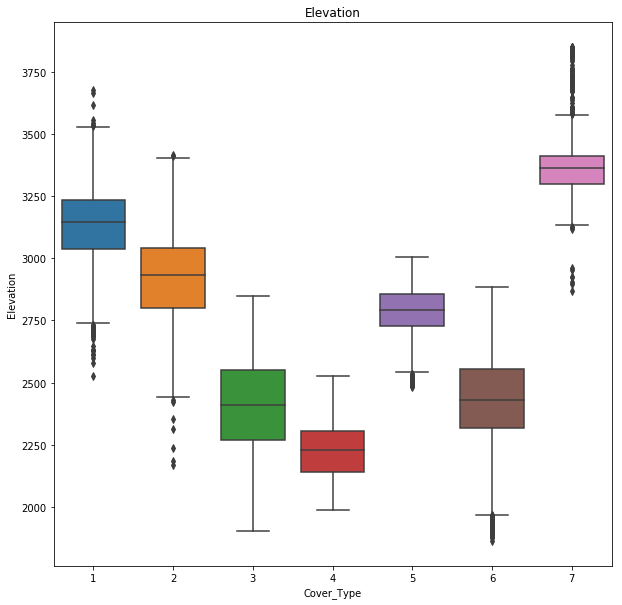

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="Cover_Type", y="Elevation", data=train)
plt.title("Elevation")
plt.show()

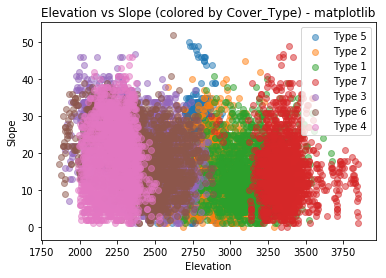

In [16]:
import matplotlib.pyplot as plt

# Cover_Type ごとに色分けしたい場合、自分でループするなど工夫が必要
for ctype in train["Cover_Type"].unique():
    subset = train[train["Cover_Type"] == ctype]
    plt.scatter(subset["Elevation"], subset["Slope"], alpha=0.5, label=f"Type {ctype}")

plt.legend()
plt.xlabel("Elevation")
plt.ylabel("Slope")
plt.title("Elevation vs Slope (colored by Cover_Type) - matplotlib")
plt.show()
